<a href="https://colab.research.google.com/github/naman-omar/Cat_Dog_Classifier/blob/main/CatsVSdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: itsnamanomar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
#Creating CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 84ms/step - accuracy: 0.5582 - loss: 3.1184 - val_accuracy: 0.5634 - val_loss: 0.9619
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5849 - loss: 0.6705 - val_accuracy: 0.5534 - val_loss: 0.7484
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6235 - loss: 0.6369 - val_accuracy: 0.6484 - val_loss: 0.6179
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7056 - loss: 0.5567 - val_accuracy: 0.7284 - val_loss: 0.6318
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7546 - loss: 0.5085 - val_accuracy: 0.7758 - val_loss: 0.4647
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7952 - loss: 0.4225 - val_accuracy: 0.7582 - val_loss: 0.5233
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8243 - loss: 0.3726 - val_accuracy: 0.7562 - val_loss: 0.5898
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8586 - loss: 0.3118 - 

In [13]:
history2 = model.fit(train_ds, epochs=15, initial_epoch=10, validation_data=validation_ds)

Epoch 11/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9240 - loss: 0.1699 - val_accuracy: 0.8174 - val_loss: 0.5086
Epoch 12/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9374 - loss: 0.1408 - val_accuracy: 0.8320 - val_loss: 0.6526
Epoch 13/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.9445 - loss: 0.1217 - val_accuracy: 0.8192 - val_loss: 0.6240
Epoch 14/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9515 - loss: 0.1045 - val_accuracy: 0.8396 - val_loss: 0.5823
Epoch 15/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9522 - loss: 0.0996 - val_accuracy: 0.8350 - val_loss: 0.5585


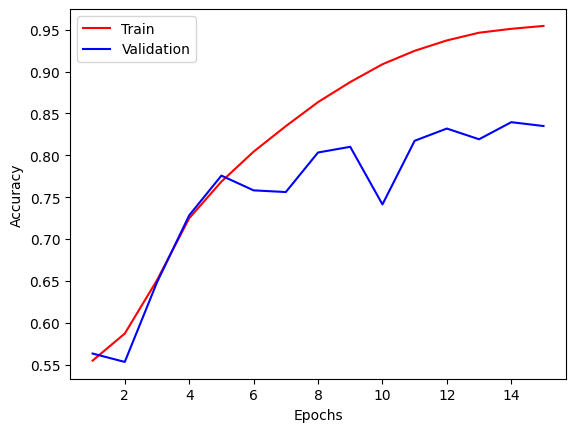

In [14]:
#plotting accuracy curve
import matplotlib.pyplot as plt

# Combine accuracies
train_acc = history.history['accuracy'] + history2.history['accuracy']
val_acc = history.history['val_accuracy'] + history2.history['val_accuracy']

# Plotting
plt.plot(range(1, 16), train_acc, color='red', label='Train')
plt.plot(range(1, 16), val_acc, color='blue', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


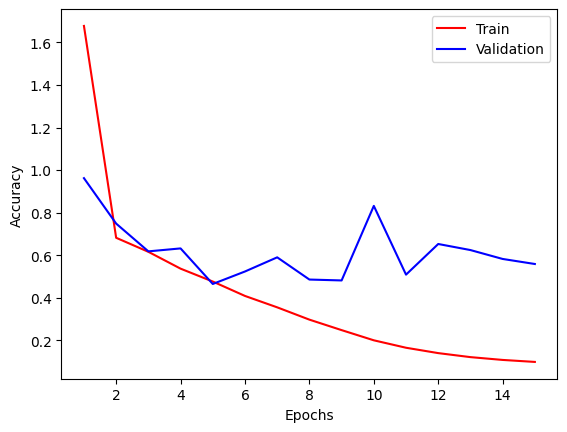

In [15]:
#plotting accuracy curve
import matplotlib.pyplot as plt

# Combine accuracies
train_acc = history.history['loss'] + history2.history['loss']
val_acc = history.history['val_loss'] + history2.history['val_loss']

# Plotting
plt.plot(range(1, 16), train_acc, color='red', label='Train')
plt.plot(range(1, 16), val_acc, color='blue', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

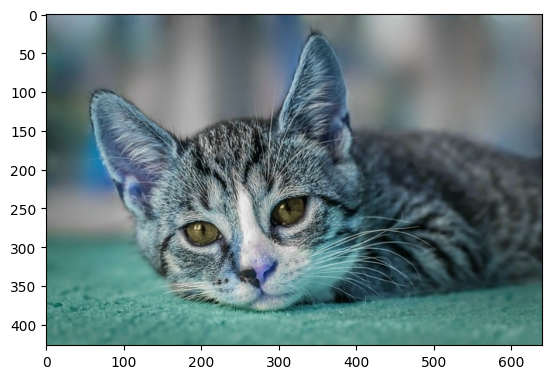

In [32]:
import cv2
test_image1 = cv2.imread('/content/cat_test.jpg')
plt.imshow(test_image1)

In [33]:
test_image1.shape

(427, 640, 3)

In [34]:
test_image1 = cv2.resize(test_image1,(256,256))
test_input1 = test_image1.reshape((1,256,256,3))

In [35]:
prediction = model.predict(test_input1)[0]
predicted_label = (prediction > 0.5).astype(int)
print(prediction, predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.] [0]


In [36]:
if predicted_label == 1:
    print("It's a Dog!")
else:
    print("It's a Cat!")

It's a Cat!


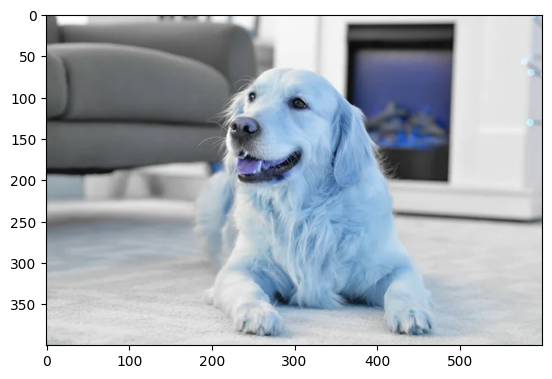

In [27]:
import cv2
test_image1 = cv2.imread('/content/Dog_test.jpg')
plt.imshow(test_image1)

In [28]:
test_image1.shape

(400, 600, 3)

In [29]:
test_image1 = cv2.resize(test_image1,(256,256))
test_input1 = test_image1.reshape((1,256,256,3))

In [30]:
prediction = model.predict(test_input1)[0]
predicted_label = (prediction > 0.5).astype(int)
print(prediction, predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[1.] [1]


In [31]:
if predicted_label == 1:
    print("It's a Dog!")
else:
    print("It's a Cat!")

It's a Dog!
